# To-do list:

Repeat twice (confirmed cases & deaths reported)
*   DONE: Add Object-Oriented Programming (class, methods, inheritance if possible)
*   DONE: Add statistical analysis code (mean, median, mode) if necessary for   comparison
*   DONE: Add min/max, sample size (len())
*   DONE: standard deviation

Questions (5) wanting to answer:
1. How many deaths and cases resulted from the COVID-19 pandemic within the US compared to its impact globally?
2. How do states deaths differ from the globally-reported deaths?
3. Between the different states, how do they differ compared to the US cases reported?
4. How do the individual states’ data on deaths and cases reported due to COVID-19 differ across the US overall?
5. How does the US death-by-COVID-19 and cases reported differ from other countries’ death and cases reports?


In [271]:
import pandas as pd

df_covid19_confirmedUS = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
df_covid19_confirmedUS.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [272]:
# US datas will have bar graphs

import matplotlib.pyplot as plt
import seaborn as sns

# Preparing the data before plotting
df_state = df_covid19_confirmedUS.groupby('Province_State').sum()
df_state = df_state.drop(columns=['UID', 'code3', 'FIPS', 'Lat', 'Long_'])

# looking at the last date in the data
last_date = df_state.columns[-1]

# Creating a new Dataframe that contains the states and the latest covid 19 confirmed cases

df_state_latest = df_state[[last_date]].reset_index()
df_state_latest.columns = ['State', 'Confirmed']
df_state_latest = pd.DataFrame({
    'State': df_state.index,
    'Confirmed': df_state[last_date]
})

# Dropping the non-states included in the US states data
non_states = ['District of Columbia', 'Northern Mariana Islands', 'Guam', 'Virgin Islands', 'American Samoa', 'Grand Princess', 'Diamond Princess', 'Puerto Rico']
df_state_latest = df_state_latest[~df_state_latest['State'].isin(non_states)]

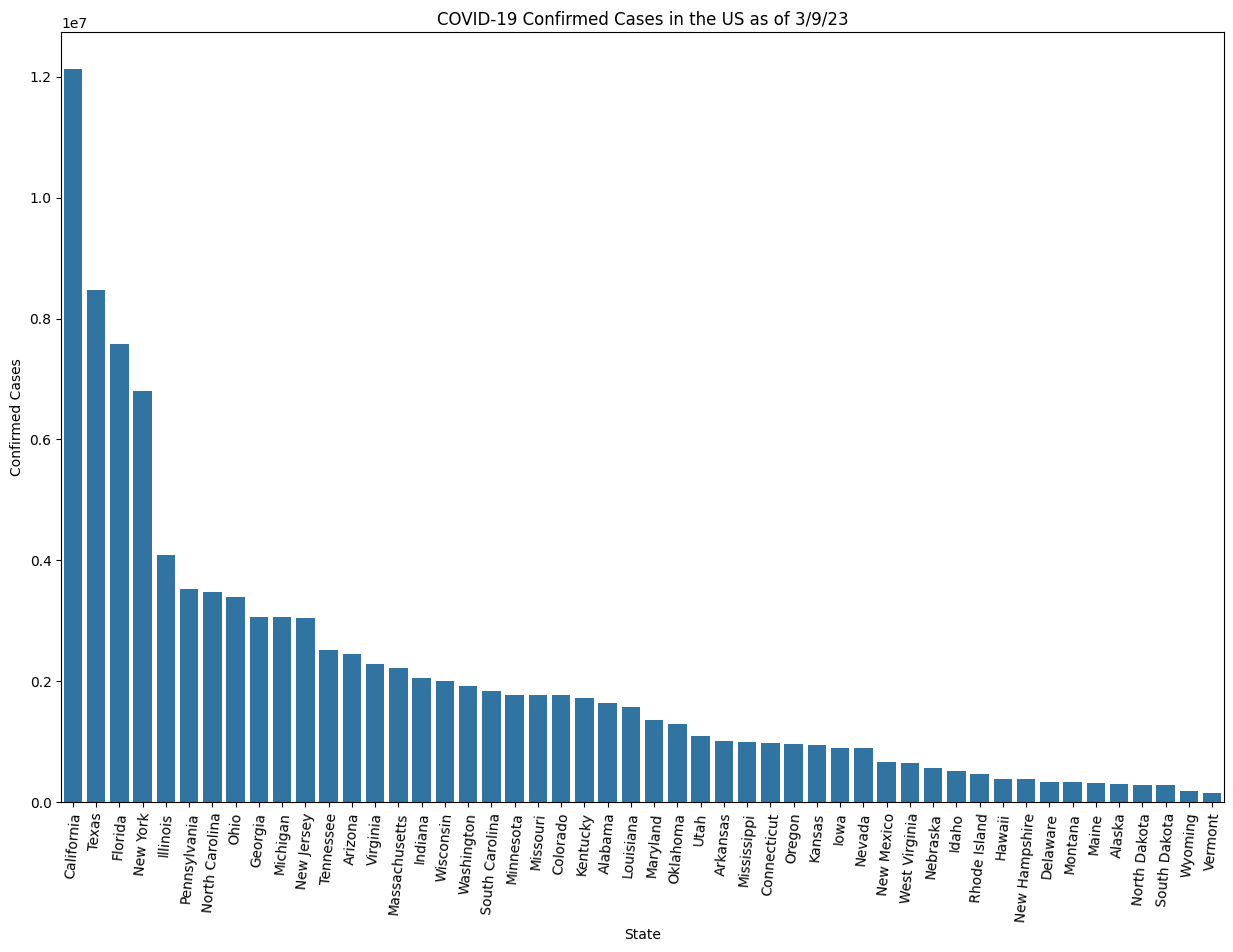

In [273]:
# Bar plot for US
plt.figure(figsize=(15, 10))
sns.barplot(x='State', y='Confirmed', data=df_state_latest.sort_values('Confirmed', ascending=False))
plt.title(f'COVID-19 Confirmed Cases in the US as of {last_date}')
plt.xlabel('State')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=85)
plt.show()

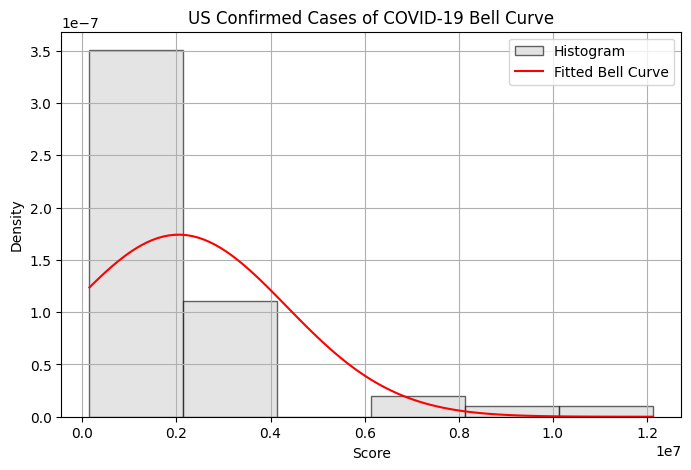

Mean: 2048306.2
Standard Deviation: 2291219.66
Minimum: 152618
Maximum: 12129699
Median: 1469553.5
Mode: 152618
Dataframe size: 50


In [274]:
from scipy.stats import norm
import numpy as np

# Statistical analysis on the 50 states of the US
confirmed_US_cases = df_state_latest['Confirmed']

US_confirmed_mean = np.mean(df_state_latest['Confirmed'])
US_confirmed_std = np.std(df_state_latest['Confirmed'])
US_confirmed_min = np.min(df_state_latest['Confirmed'])
US_confirmed_max = np.max(df_state_latest['Confirmed'])
US_confirmed_median = np.median(df_state_latest['Confirmed'])
US_confirmed_mode = np.argmax(np.bincount(df_state_latest['Confirmed']))
US_confirmed_dfsize = len(df_state_latest['Confirmed'])    # to remind people of sample size

x = np.linspace(min(df_state_latest['Confirmed'])-10, max(df_state_latest['Confirmed'])+10, 100)
y = norm.pdf(x, US_confirmed_mean, US_confirmed_std)

# Plotting a histogram and bell curve to show statistical significance
plt.figure(figsize=(8, 5))
plt.hist(df_state_latest['Confirmed'], bins=6, density=True, alpha=0.6, color='lightgray', edgecolor='black', label='Histogram')
plt.plot(x, y, color='red', label='Fitted Bell Curve')
plt.title('US Confirmed Cases of COVID-19 Bell Curve')
plt.xlabel('Score')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

print(f'Mean: {round(US_confirmed_mean, 2)}')
print(f'Standard Deviation: {round(US_confirmed_std, 2)}')
print(f'Minimum: {round(US_confirmed_min, 2)}')
print(f'Maximum: {round(US_confirmed_max, 2)}')
print(f'Median: {round(US_confirmed_median, 2)}')
print(f'Mode: {round(US_confirmed_mode, 2)}')
print(f'Dataframe size: {round(US_confirmed_dfsize, 2)}')

In [275]:
# Total cases reported in the US
sum_states_confirmed = df_state_latest['Confirmed'].sum()
print(f'Total confirmed cases in the US: {sum_states_confirmed}')

Total confirmed cases in the US: 102415310


In [276]:
df_covid19_confirmedGlobal = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_covid19_confirmedGlobal.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


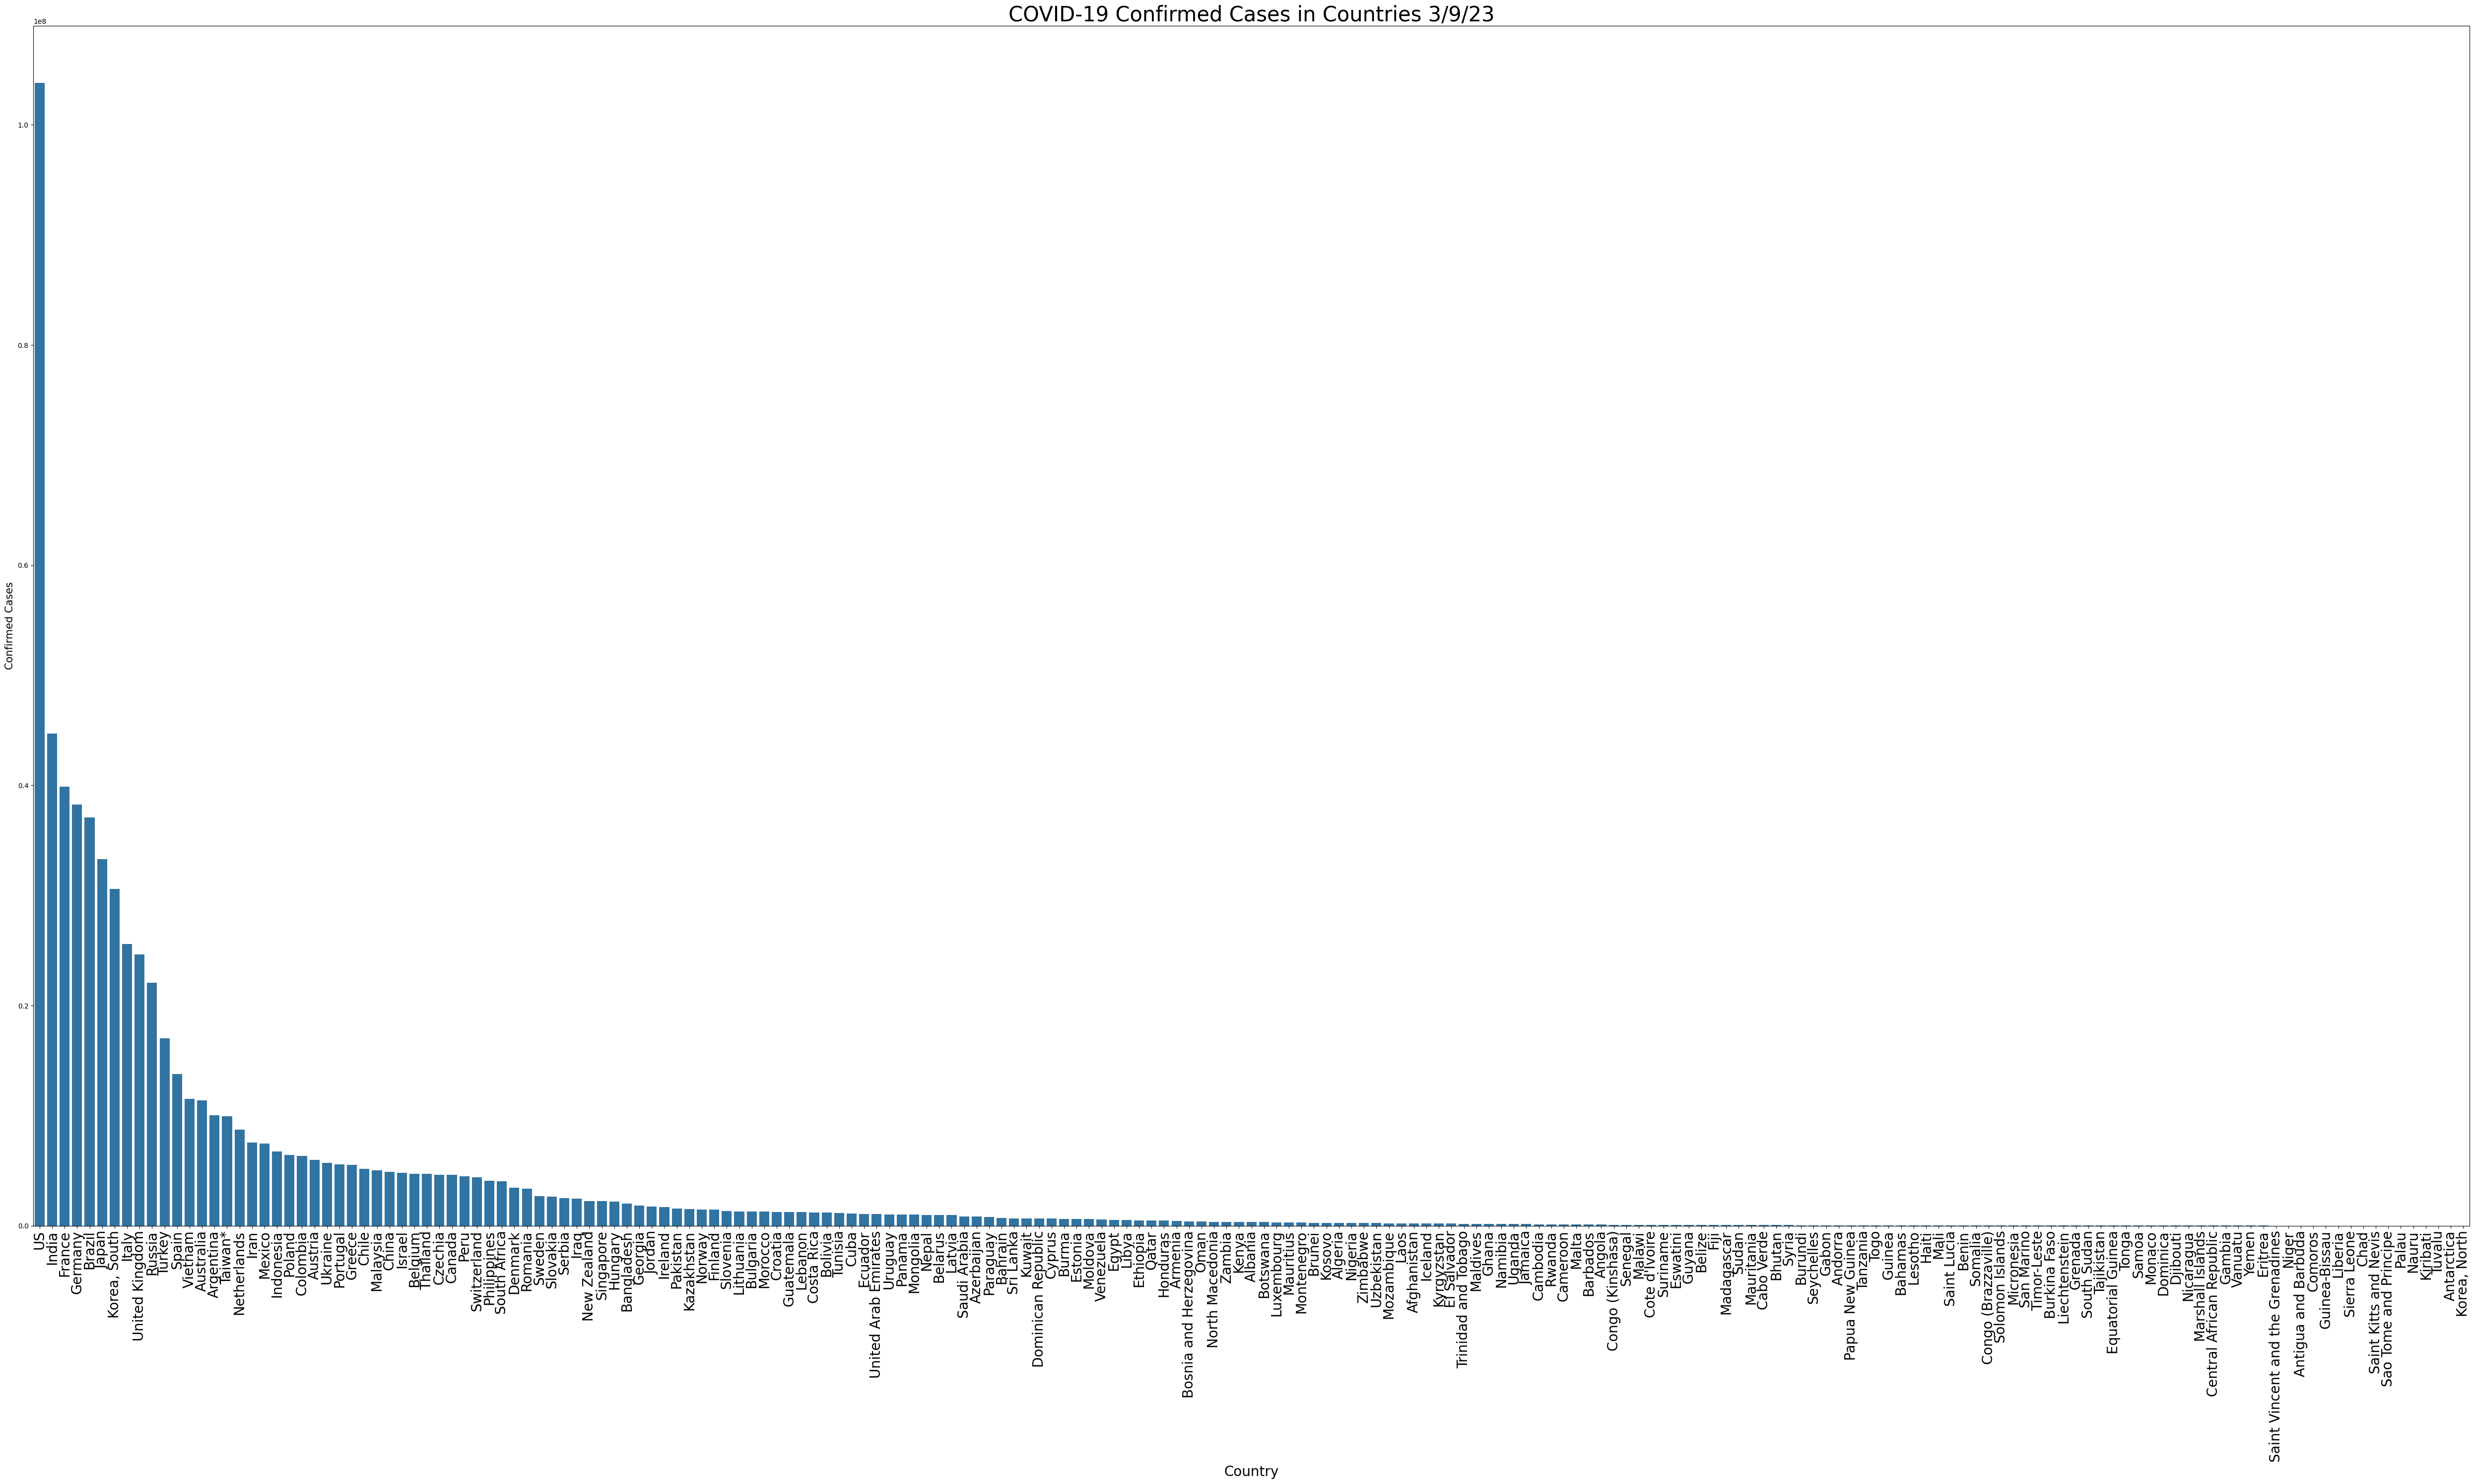

In [277]:
# ALL Global data BarPlot
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing the data before plotting
df_global = df_covid19_confirmedGlobal.groupby('Country/Region').sum()
df_global = df_global.drop(columns=['Lat', 'Long'])

# looking at the last date in the data
last_date = df_global.columns[-1]

# Creating a new Dataframe that contains the states and the latest covid 19 confirmed cases

df_global_latest = df_global[[last_date]].reset_index()
df_global_latest.columns = ['Country', 'Confirmed']

# Filtering out non-countries data
non_countries = ['Diamond Princess', 'MS Zaandam', 'Grand Princess', 'Holy See', 'Western Sahara',
                 'West Bank and Gaza', 'Summer Olympics 2020', 'Winter Olympics 2022',
                 'Puerto Rico', 'French Guiana', 'Réunion',
                 'Mayotte', 'New Caledonia', 'Martinique', 'Aruba', 'Curacao', 'Bermuda',
                 'Faroe Islands', 'Gibraltar', 'Isle of Man', 'Montserrat', 'Channel Islands',
                 'Sint Maarten', 'Saint Martin', 'Saint Barthelemy', 'Falkland Islands',
                 'Saint Pierre and Miquelon', 'British Virgin Islands', 'Cayman Islands',
                 'Turks and Caicos Islands', 'Anguilla']

df_global_latest = df_global_latest[~df_global_latest['Country'].isin(non_countries)]

df_global
# Bar plot for Country data
plt.figure(figsize=(50, 30))
sns.barplot(x='Country', y='Confirmed', data=df_global_latest.sort_values('Confirmed', ascending=False))
plt.title(f'COVID-19 Confirmed Cases in Countries {last_date}', fontsize = 30)
plt.xlabel('Country', fontsize = 20)
plt.ylabel('Confirmed Cases', fontsize = 15)
plt.xticks(rotation=90, fontsize = 20)
plt.tight_layout()
plt.show()



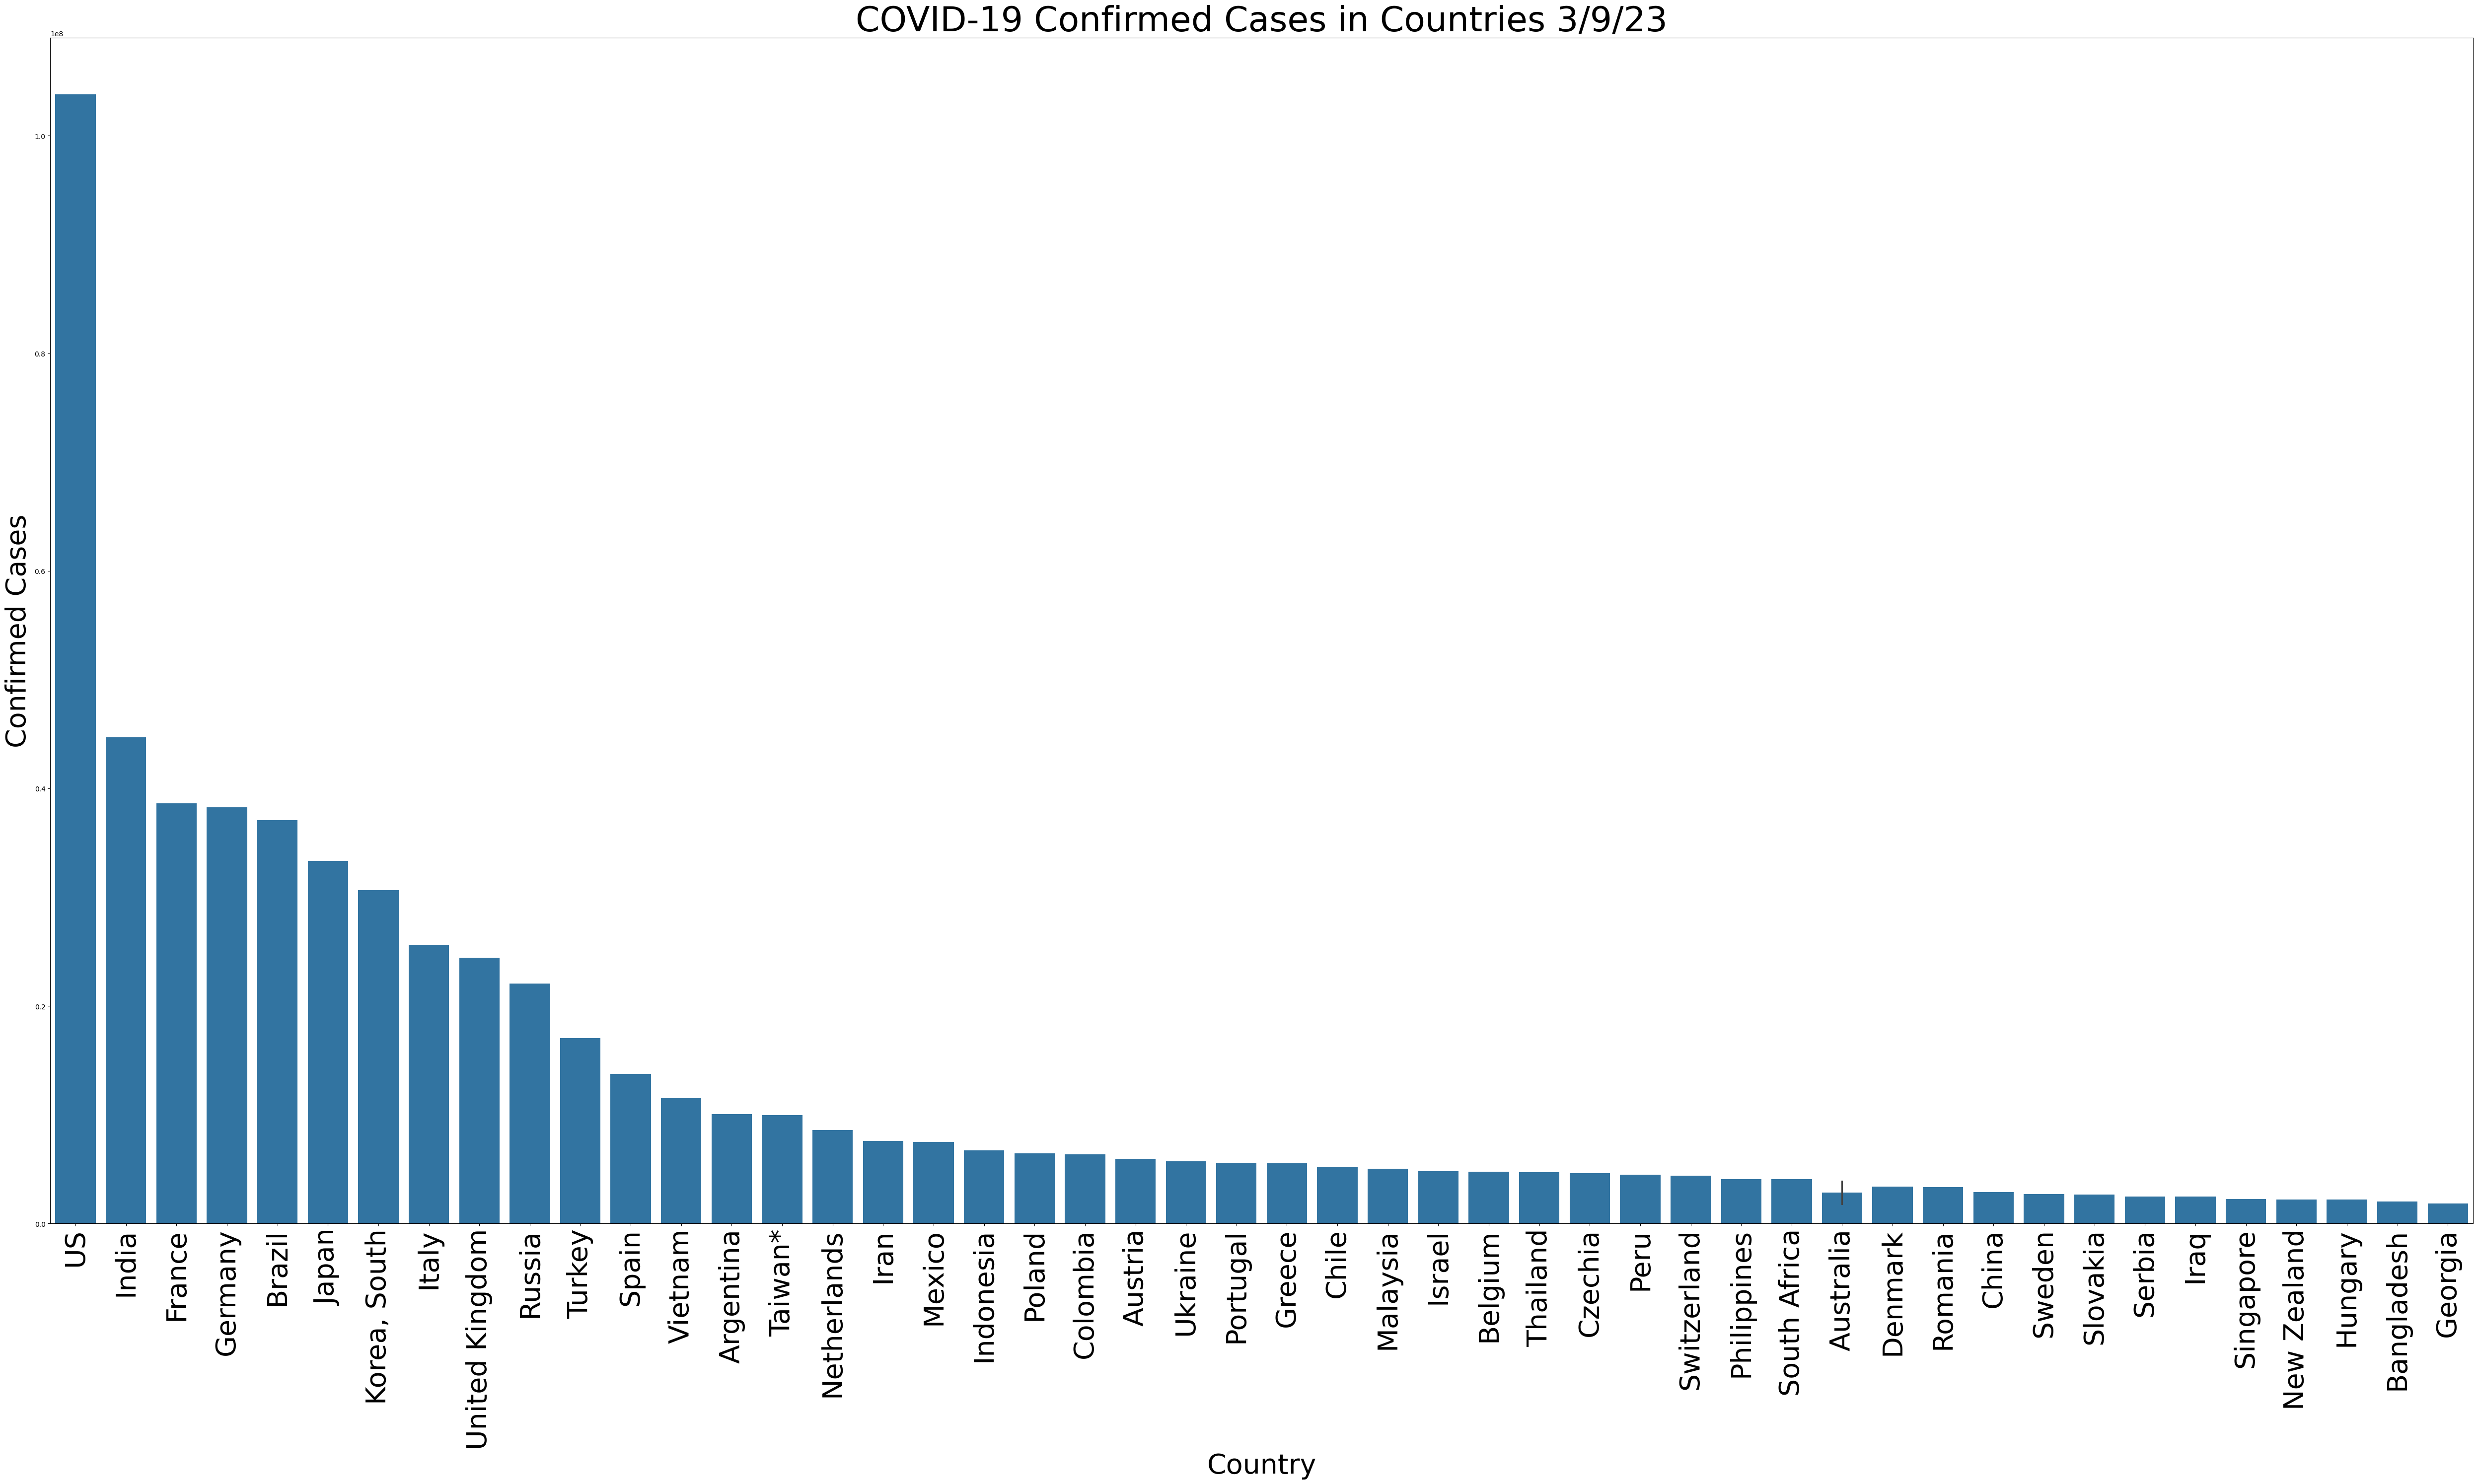

In [278]:
# Filtered Global Data for statistical analysis visual by taking the top 50 countries

# As shown above, dataset with ALL countries make it hard to compare, so based on high reportings, those countries will be filtered out
# Meaning, any countries that fall below a threshold will be removed as outliers (under reporting of cases)

# Creating a class to utilize Object-Oriented Programming for filtering
class filtered_global_cases:
  def __init__(self, df):
      self.df = df
      self.last_date = df.columns[-1]
      self._non_countries = [
            'Diamond Princess', 'MS Zaandam', 'Grand Princess', 'Holy See', 'Western Sahara',
            'West Bank and Gaza', 'Summer Olympics 2020', 'Winter Olympics 2022',
            'Puerto Rico', 'French Guiana', 'Réunion', 'Mayotte', 'New Caledonia',
            'Martinique', 'Aruba', 'Curacao', 'Bermuda', 'Faroe Islands', 'Gibraltar',
            'Isle of Man', 'Montserrat', 'Channel Islands', 'Sint Maarten', 'Saint Martin',
            'Saint Barthelemy', 'Falkland Islands', 'Saint Pierre and Miquelon',
            'British Virgin Islands', 'Cayman Islands', 'Turks and Caicos Islands', 'Anguilla'
        ]
      self.df_latest = None

  def filtered_global_cases(self):
      df_latest = self.df[['Country/Region', self.last_date]]
      df_latest.columns = ['Country', 'Confirmed']
      df_filtered = df_latest[~df_latest['Country'].isin(self._non_countries)]
      self.df_latest = df_filtered.sort_values('Confirmed', ascending=False).head(50)
      return self.df_latest

top50_global_cases = filtered_global_cases(df_covid19_confirmedGlobal)
df_top50 = top50_global_cases.filtered_global_cases()

# Bar plot for Country data
plt.figure(figsize=(50, 30))
sns.barplot(x='Country', y='Confirmed', data=df_top50.sort_values('Confirmed', ascending=False))
plt.title(f'COVID-19 Confirmed Cases in Countries {last_date}', fontsize = 50)
plt.xlabel('Country', fontsize = 40)
plt.ylabel('Confirmed Cases', fontsize = 40)
plt.xticks(rotation=90, fontsize = 40)
plt.tight_layout()
plt.show()

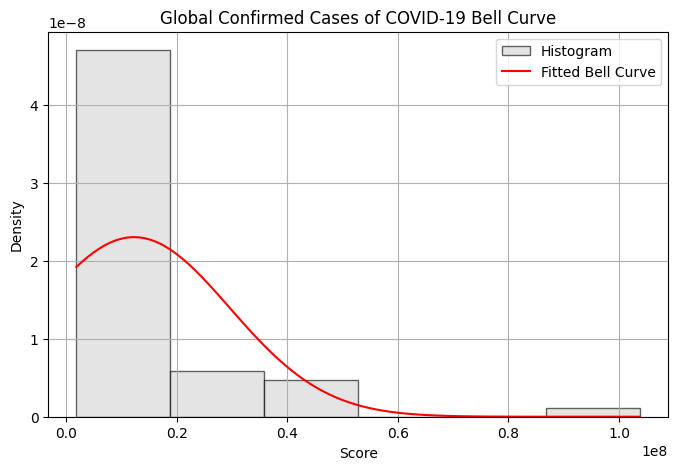

Mean: 12241562.36
Standard Deviation: 17305962.47
Minimum: 1800236
Maximum: 103802702
Median: 5370386.5
Mode: 1800236
Dataframe size: 50


In [279]:
# Statistical analysis on the filtered 50 countries
confirmed_global_cases = df_top50['Confirmed']

global_confirmed_mean = np.mean(df_top50['Confirmed'])
global_confirmed_std = np.std(df_top50['Confirmed'])
global_confirmed_min = np.min(df_top50['Confirmed'])
global_confirmed_max = np.max(df_top50['Confirmed'])
global_confirmed_median = np.median(df_top50['Confirmed'])
global_confirmed_mode = np.argmax(np.bincount(df_top50['Confirmed']))
global_confirmed_dfsize = len(df_top50['Confirmed'])    # to remind people of sample size

x = np.linspace(min(df_top50['Confirmed'])-10, max(df_top50['Confirmed'])+10, 100)
y = norm.pdf(x, global_confirmed_mean, global_confirmed_std)

# Plotting a histogram and bell curve to show statistical significance
plt.figure(figsize=(8, 5))
plt.hist(df_top50['Confirmed'], bins=6, density=True, alpha=0.6, color='lightgray', edgecolor='black', label='Histogram')
plt.plot(x, y, color='red', label='Fitted Bell Curve')
plt.title('Global Confirmed Cases of COVID-19 Bell Curve')
plt.xlabel('Score')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

print(f'Mean: {round(global_confirmed_mean, 2)}')
print(f'Standard Deviation: {round(global_confirmed_std, 2)}')
print(f'Minimum: {round(global_confirmed_min, 2)}')
print(f'Maximum: {round(global_confirmed_max, 2)}')
print(f'Median: {round(global_confirmed_median, 2)}')
print(f'Mode: {round(global_confirmed_mode, 2)}')
print(f'Dataframe size: {round(global_confirmed_dfsize, 2)}')

In [280]:
# Total cases reported Globally
sum_countries_confirmed = df_top50['Confirmed'].sum()
print(f'Total confirmed cases Globally: {sum_countries_confirmed}')

Total confirmed cases Globally: 612078118


In [281]:
df_covid19_deathsUS = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
df_covid19_deathsUS.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,230,232,232,232,232,232,232,232,232,232
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,724,726,726,726,726,726,726,726,727,727
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,103,103,103,103,103,103,103,103,103,103
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,109,109,109,109,109,109,109,109,109,109
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,261,261,261,261,261,261,261,261,261,261


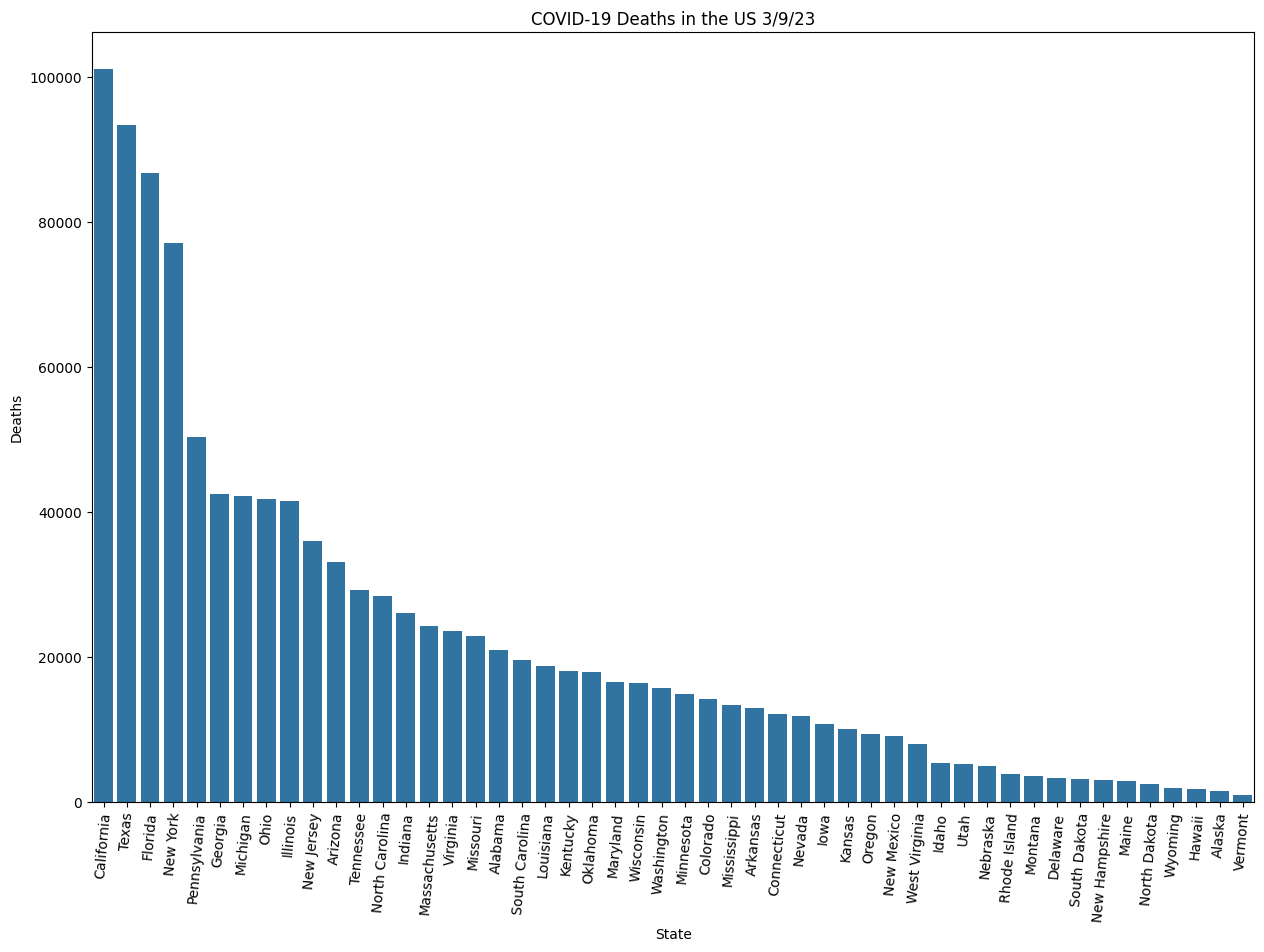

In [282]:
# Deaths in the US

# Preparing the data
df_state = df_covid19_deathsUS.groupby('Province_State').sum()
df_state = df_state.drop(columns=['UID', 'code3', 'FIPS', 'Lat', 'Long_'])

#Getting the lastest date
last_date = df_state.columns[-1]

#Creating a new dataframe with the deaths based on state
df_state_latest = pd.DataFrame({
    'State': df_state.index,
    'Deaths': df_state[last_date]
})

#Dropping unwanted stuff from the graphs
non_states = ['District of Columbia', 'Northern Mariana Islands', 'Guam', 'Virgin Islands', 'American Samoa', 'Grand Princess', 'Diamond Princess', 'Puerto Rico']
df_state_latest = df_state_latest[~df_state_latest['State'].isin(non_states)]

#Plotting the bar graph for deaths in the US
plt.figure(figsize=(15, 10))
sns.barplot(x='State', y='Deaths', data=df_state_latest.sort_values('Deaths', ascending=False))
plt.title(f'COVID-19 Deaths in the US {last_date}')
plt.xlabel('State')
plt.ylabel('Deaths')
plt.xticks(rotation=85)
plt.show()

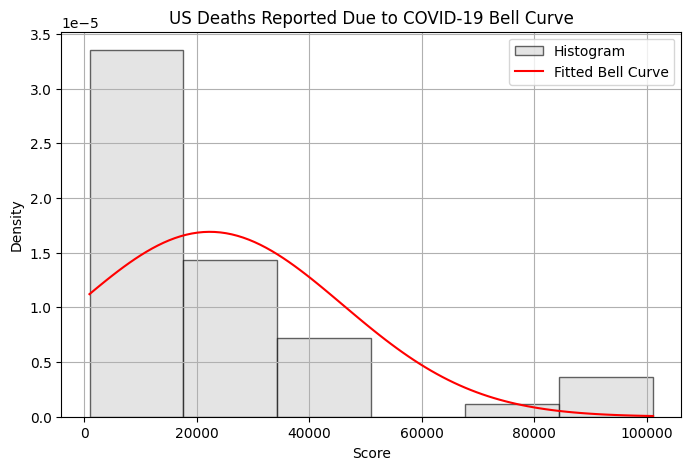

Mean: 22319.06
Standard Deviation: 23600.54
Minimum: 929
Maximum: 101159
Median: 15276.5
Mode: 929
Dataframe size: 50


In [283]:
# Statistical analysis on the 50 states of the US
deaths_US = df_state_latest['Deaths']

US_deaths_mean = np.mean(df_state_latest['Deaths'])
US_deaths_std = np.std(df_state_latest['Deaths'])
US_deaths_min = np.min(df_state_latest['Deaths'])
US_deaths_max = np.max(df_state_latest['Deaths'])
US_deaths_median = np.median(df_state_latest['Deaths'])
US_deaths_mode = np.argmax(np.bincount(df_state_latest['Deaths']))
US_deaths_dfsize = len(df_state_latest['Deaths'])    # to remind people of sample size

x = np.linspace(min(df_state_latest['Deaths'])-10, max(df_state_latest['Deaths'])+10, 100)
y = norm.pdf(x, US_deaths_mean, US_deaths_std)

# Plotting a histogram and bell curve to show statistical significance
plt.figure(figsize=(8, 5))
plt.hist(df_state_latest['Deaths'], bins=6, density=True, alpha=0.6, color='lightgray', edgecolor='black', label='Histogram')
plt.plot(x, y, color='red', label='Fitted Bell Curve')
plt.title('US Deaths Reported Due to COVID-19 Bell Curve')
plt.xlabel('Score')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

print(f'Mean: {round(US_deaths_mean, 2)}')
print(f'Standard Deviation: {round(US_deaths_std, 2)}')
print(f'Minimum: {round(US_deaths_min, 2)}')
print(f'Maximum: {round(US_deaths_max, 2)}')
print(f'Median: {round(US_deaths_median, 2)}')
print(f'Mode: {round(US_deaths_mode, 2)}')
print(f'Dataframe size: {round(US_deaths_dfsize, 2)}')

In [284]:
# Total deaths in the US
sum_states_deaths = df_state_latest['Deaths'].sum()
print(f'Total deaths in the US: {sum_states_deaths}')

Total deaths in the US: 1115953


In [285]:
df_covid19_deathsGlobal = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_covid19_deathsGlobal.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


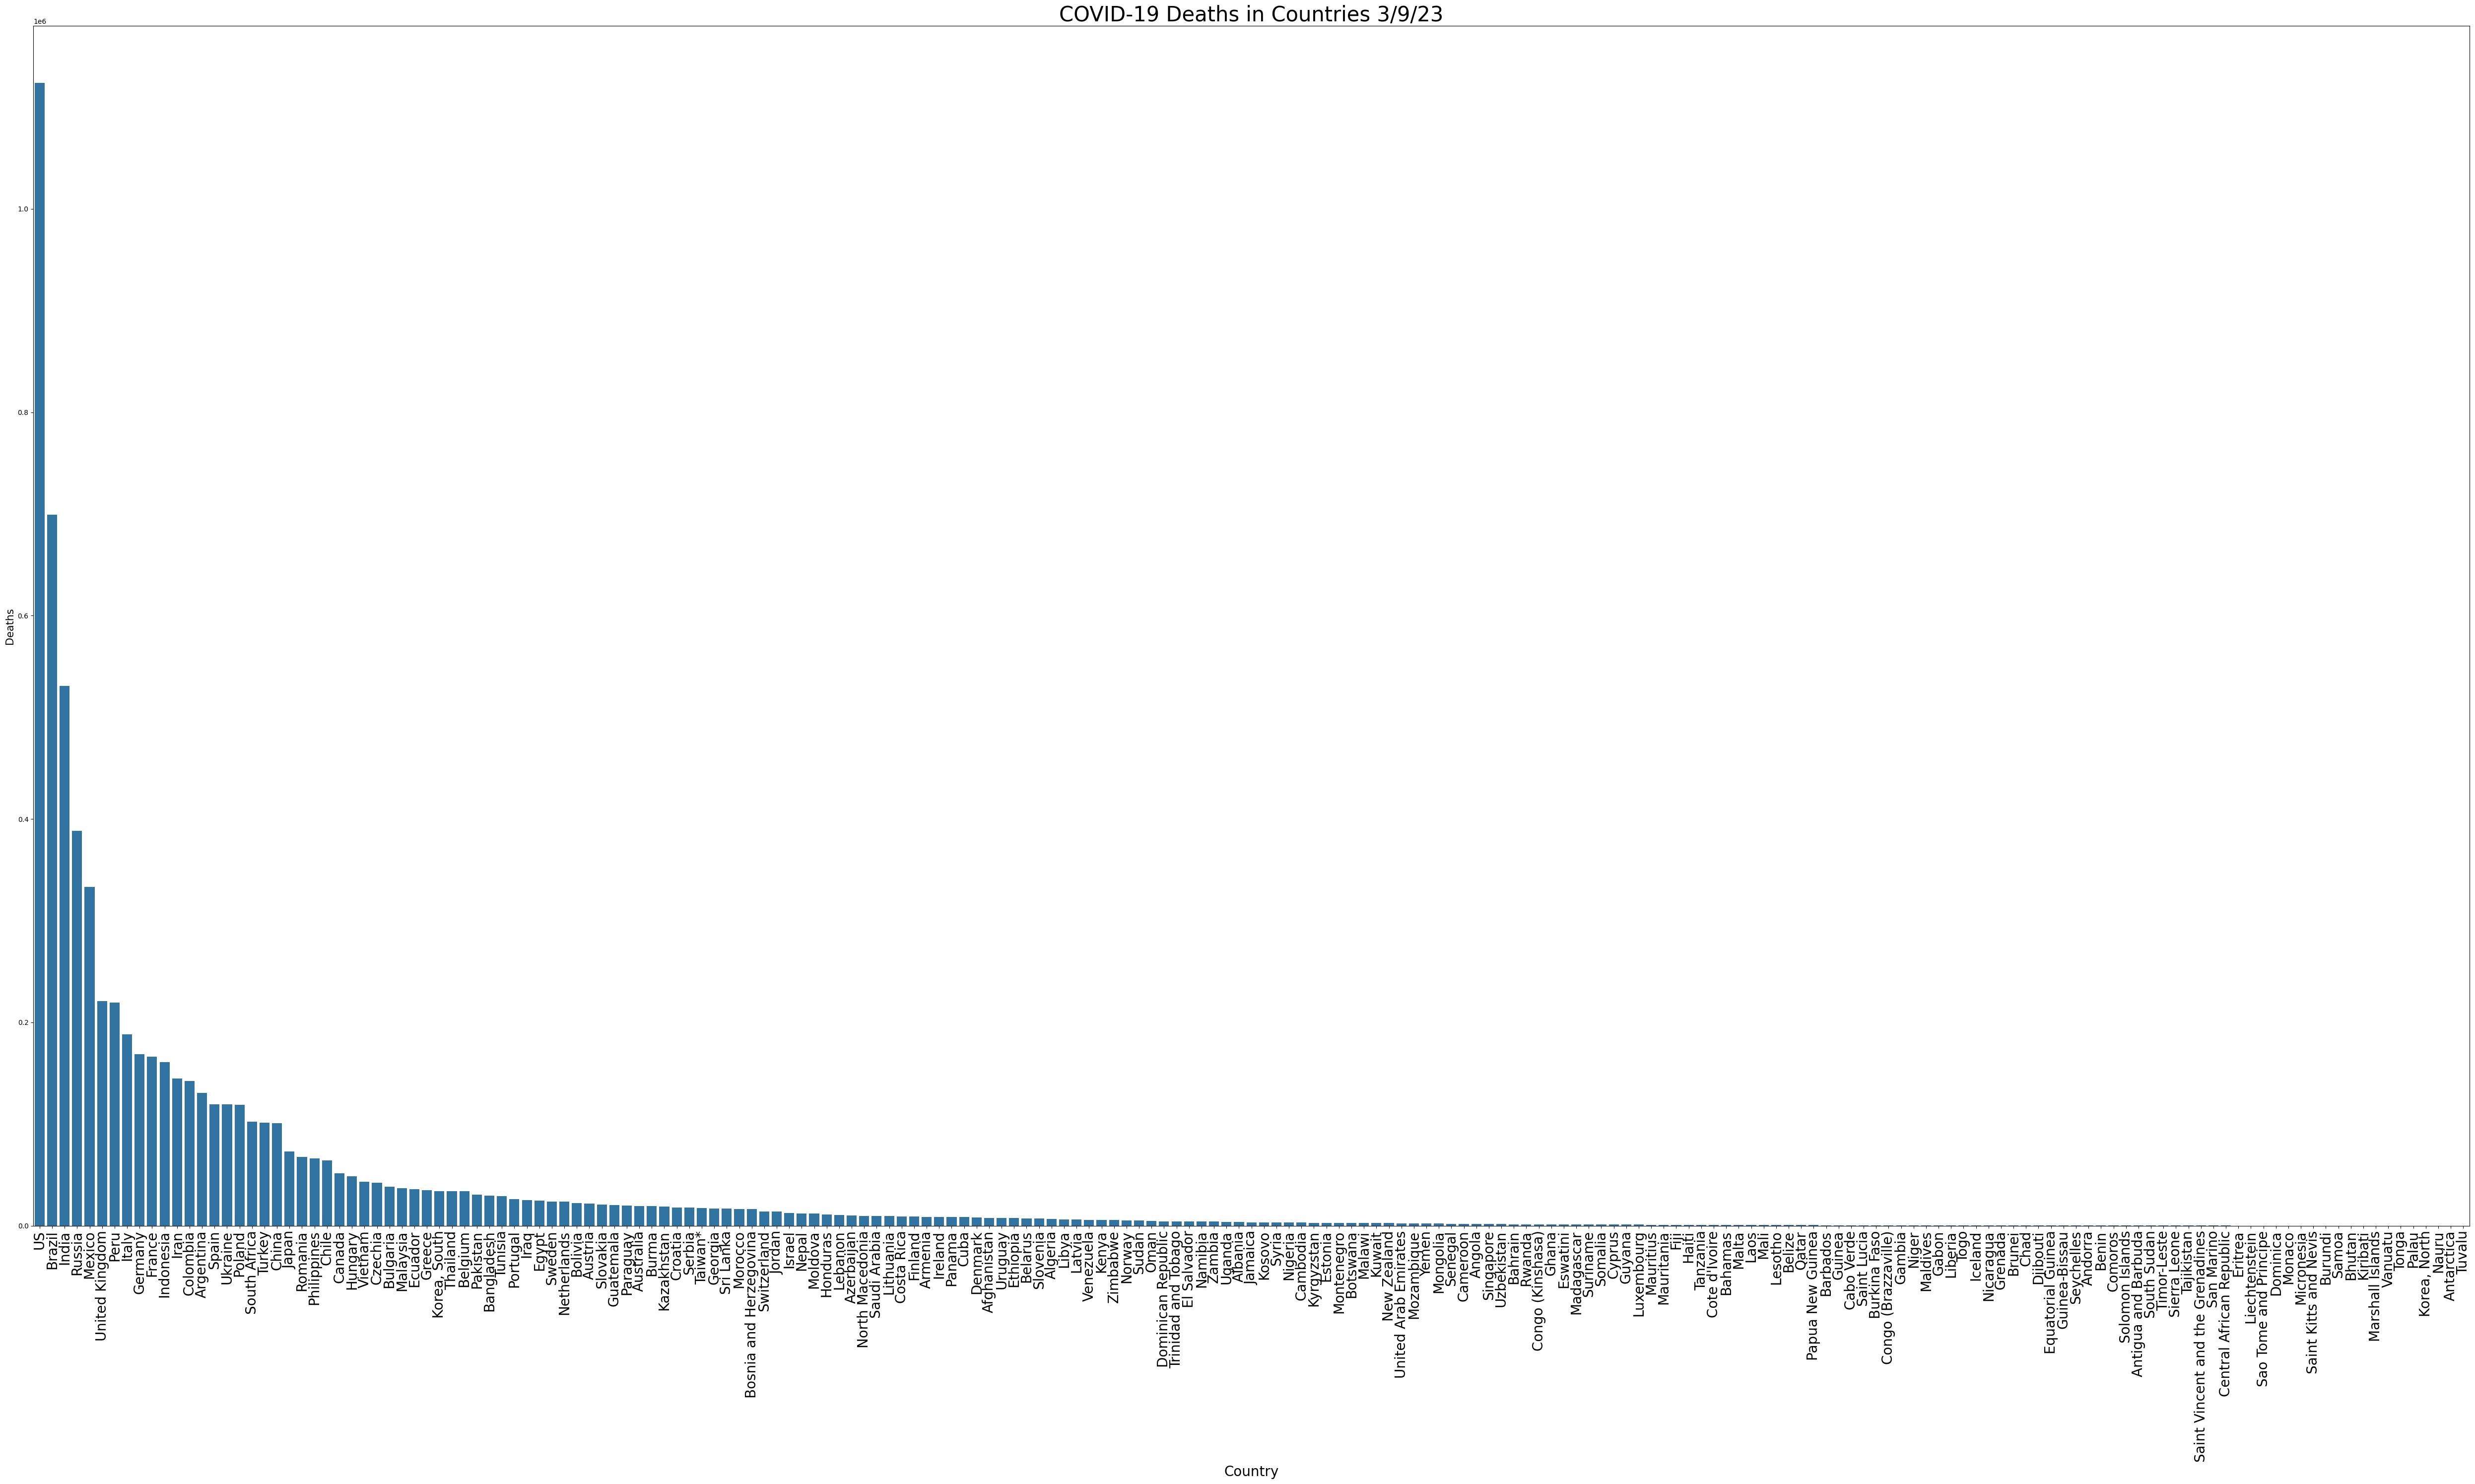

In [286]:
# Deaths globally

#Preparing the data
df_global = df_covid19_deathsGlobal.groupby('Country/Region').sum()
df_global = df_global.drop(columns=['Lat', 'Long'])

#Getting the lastest date
last_date = df_global.columns[-1]

#Creating a new dataframe with the deaths based on country
df_global_latest = pd.DataFrame({
    'Country': df_global.index,
    'Deaths': df_global[last_date]
})

# Filtering out non-countries data
non_countries = ['Diamond Princess', 'MS Zaandam', 'Grand Princess', 'Holy See', 'Western Sahara',
                 'West Bank and Gaza', 'Summer Olympics 2020', 'Winter Olympics 2022',
                 'Puerto Rico', 'French Guiana', 'Réunion',
                 'Mayotte', 'New Caledonia', 'Martinique', 'Aruba', 'Curacao', 'Bermuda',
                 'Faroe Islands', 'Gibraltar', 'Isle of Man', 'Montserrat', 'Channel Islands',
                 'Sint Maarten', 'Saint Martin', 'Saint Barthelemy', 'Falkland Islands',
                 'Saint Pierre and Miquelon', 'British Virgin Islands', 'Cayman Islands',
                 'Turks and Caicos Islands', 'Anguilla']
df_global_latest = df_global_latest[~df_global_latest['Country'].isin(non_countries)]

#Plotting the Bar plot
plt.figure(figsize=(50, 30))
sns.barplot(x='Country', y='Deaths', data=df_global_latest.sort_values('Deaths', ascending=False))
plt.title(f'COVID-19 Deaths in Countries {last_date}', fontsize = 30)
plt.xlabel('Country', fontsize = 20)
plt.ylabel('Deaths', fontsize = 15)
plt.xticks(rotation=90, fontsize = 20)
plt.tight_layout()
plt.show()

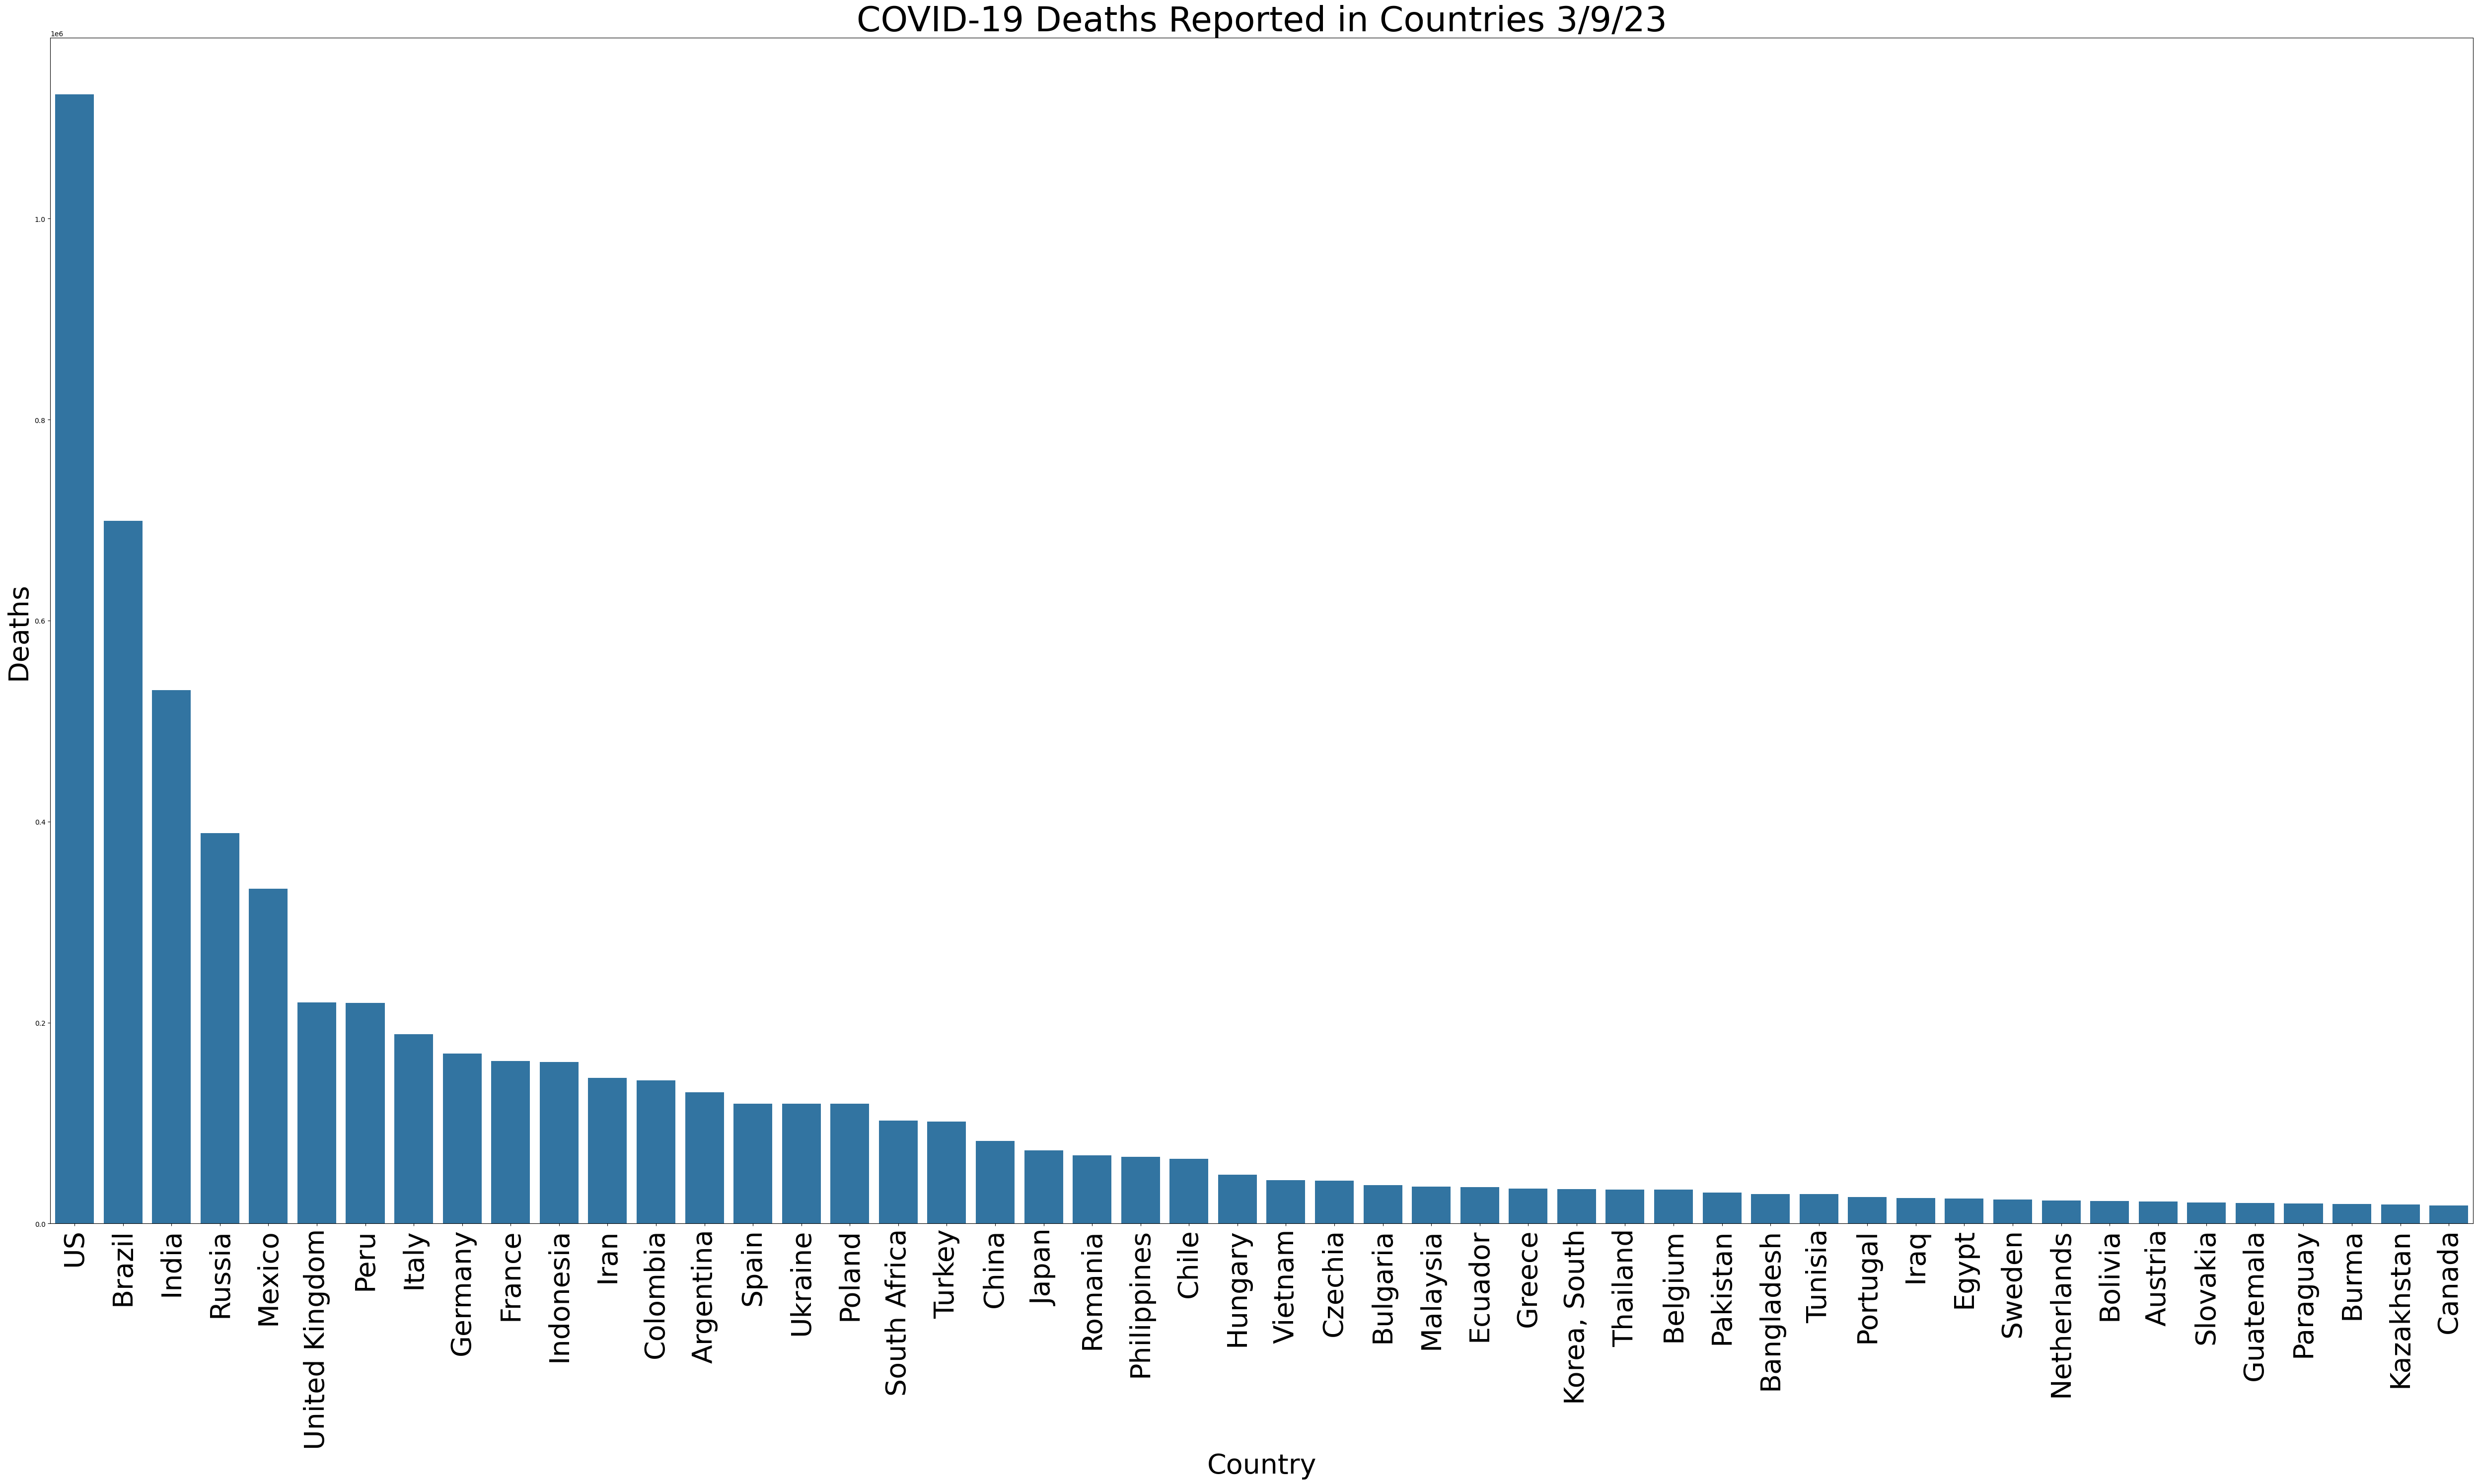

In [287]:
# Creating a class to utilize Object-Oriented Programming for filtering the top 50 countries with the highest deaths reported
class filtered_global_deaths:
  def __init__(self, df):
      self.df = df
      self.last_date = df.columns[-1]
      self._non_countries = [
            'Diamond Princess', 'MS Zaandam', 'Grand Princess', 'Holy See', 'Western Sahara',
            'West Bank and Gaza', 'Summer Olympics 2020', 'Winter Olympics 2022',
            'Puerto Rico', 'French Guiana', 'Réunion', 'Mayotte', 'New Caledonia',
            'Martinique', 'Aruba', 'Curacao', 'Bermuda', 'Faroe Islands', 'Gibraltar',
            'Isle of Man', 'Montserrat', 'Channel Islands', 'Sint Maarten', 'Saint Martin',
            'Saint Barthelemy', 'Falkland Islands', 'Saint Pierre and Miquelon',
            'British Virgin Islands', 'Cayman Islands', 'Turks and Caicos Islands', 'Anguilla'
        ]
      self.df_latest = None

  def filtered_global_deaths(self):
      df_latest = self.df[['Country/Region', self.last_date]]
      df_latest.columns = ['Country', 'Deaths']
      df_filtered = df_latest[~df_latest['Country'].isin(self._non_countries)]
      self.df_latest = df_filtered.sort_values('Deaths', ascending=False).head(50)
      return self.df_latest

top50_global_deaths = filtered_global_deaths(df_covid19_deathsGlobal)
df_top50 = top50_global_deaths.filtered_global_deaths()

# Bar plot for Country data
plt.figure(figsize=(50, 30))
sns.barplot(x='Country', y='Deaths', data=df_top50.sort_values('Deaths', ascending=False))
plt.title(f'COVID-19 Deaths Reported in Countries {last_date}', fontsize = 50)
plt.xlabel('Country', fontsize = 40)
plt.ylabel('Deaths', fontsize = 40)
plt.xticks(rotation=90, fontsize = 40)
plt.tight_layout()
plt.show()

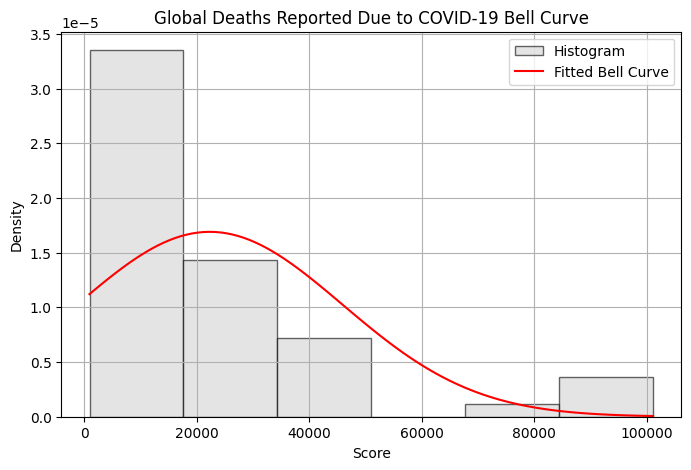

Mean: 22319.06
Standard Deviation: 23600.54
Minimum: 929
Maximum: 101159
Median: 15276.5
Mode: 929
Dataframe size: 50


In [288]:
# Statistical analysis on the filtered 50 countries
deaths_global = df_state_latest['Deaths']

global_deaths_mean = np.mean(df_state_latest['Deaths'])
global_deaths_std = np.std(df_state_latest['Deaths'])
global_deaths_min = np.min(df_state_latest['Deaths'])
global_deaths_max = np.max(df_state_latest['Deaths'])
global_deaths_median = np.median(df_state_latest['Deaths'])
global_deaths_mode = np.argmax(np.bincount(df_state_latest['Deaths']))
global_deaths_dfsize = len(df_state_latest['Deaths'])    # to remind people of sample size

x = np.linspace(min(df_state_latest['Deaths'])-10, max(df_state_latest['Deaths'])+10, 100)
y = norm.pdf(x, global_deaths_mean, global_deaths_std)

# Plotting a histogram and bell curve to show statistical significance
plt.figure(figsize=(8, 5))
plt.hist(df_state_latest['Deaths'], bins=6, density=True, alpha=0.6, color='lightgray', edgecolor='black', label='Histogram')
plt.plot(x, y, color='red', label='Fitted Bell Curve')
plt.title('Global Deaths Reported Due to COVID-19 Bell Curve')
plt.xlabel('Score')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

print(f'Mean: {round(global_deaths_mean, 2)}')
print(f'Standard Deviation: {round(global_deaths_std, 2)}')
print(f'Minimum: {round(global_deaths_min, 2)}')
print(f'Maximum: {round(global_deaths_max, 2)}')
print(f'Median: {round(global_deaths_median, 2)}')
print(f'Mode: {round(global_deaths_mode, 2)}')
print(f'Dataframe size: {round(global_deaths_dfsize, 2)}')

In [289]:
# Total deaths Globally
sum_countries_deaths = df_top50['Deaths'].sum()
print(f'Total deaths Globally: {sum_countries_deaths}')

Total deaths Globally: 6284799


In [228]:
import pandas as pd

# Reloading all US data to reorganize before merging datasets
url_confirmed_us = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
url_deaths_us = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

df_us_confirmed = pd.read_csv(url_confirmed_us)
df_us_deaths = pd.read_csv(url_deaths_us)

# Reorganizing all columns of raw state dataset again
df_us_confirmed_state = df_us_confirmed.groupby('Province_State').sum(numeric_only=True).drop(columns=['UID', 'code3', 'FIPS', 'Lat', 'Long_'], errors='ignore')
df_us_deaths_state = df_us_deaths.groupby('Province_State').sum(numeric_only=True).drop(columns=['UID', 'code3', 'FIPS', 'Lat', 'Long_', 'Population'], errors='ignore')

last_date_us = df_us_confirmed_state.columns[-1]

df_us = pd.DataFrame({
    'Location': df_us_confirmed_state.index,
    'Confirmed': df_us_confirmed_state[last_date_us],
    'Deaths': df_us_deaths_state[last_date_us]
})
df_us['Region'] = 'USA'

# Dropping the non-states included in the US states data
false_states = ['District of Columbia', 'Northern Mariana Islands', 'Guam', 'Virgin Islands', 'American Samoa', 'Grand Princess', 'Diamond Princess', 'Puerto Rico']
df_us = df_us[~df_us['Location'].isin(false_states)]

# Reloading all Global data to reorganize before merging datasets
url_confirmed_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_deaths_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

df_global_confirmed = pd.read_csv(url_confirmed_global)
df_global_deaths = pd.read_csv(url_deaths_global)

# Reorganizing all columns of raw global dataset again
df_global_confirmed_country = df_global_confirmed.groupby('Country/Region').sum(numeric_only=True).drop(columns=['Lat', 'Long'], errors='ignore')
df_global_deaths_country = df_global_deaths.groupby('Country/Region').sum(numeric_only=True).drop(columns=['Lat', 'Long'], errors='ignore')

# Excluding the US from global data to prevent duplicates
df_global_confirmed_country = df_global_confirmed_country.drop(index='US', errors='ignore')
df_global_deaths_country = df_global_deaths_country.drop(index='US', errors='ignore')

last_date_global = df_global_confirmed_country.columns[-1]

df_global = pd.DataFrame({
    'Location': df_global_confirmed_country.index,
    'Confirmed': df_global_confirmed_country[last_date_global],
    'Deaths': df_global_deaths_country[last_date_global]
})
df_global['Region'] = 'Global'

# Dropping the non-countries included in the Global data
false_countries = ['Diamond Princess', 'MS Zaandam', 'Grand Princess', 'Holy See', 'Western Sahara',
                 'West Bank and Gaza', 'Summer Olympics 2020', 'Winter Olympics 2022',
                 'Puerto Rico', 'French Guiana', 'Réunion',
                 'Mayotte', 'New Caledonia', 'Martinique', 'Aruba', 'Curacao', 'Bermuda',
                 'Faroe Islands', 'Gibraltar', 'Isle of Man', 'Montserrat', 'Channel Islands',
                 'Sint Maarten', 'Saint Martin', 'Saint Barthelemy', 'Falkland Islands',
                 'Saint Pierre and Miquelon', 'British Virgin Islands', 'Cayman Islands',
                 'Turks and Caicos Islands', 'Anguilla']

df_global = df_global[~df_global['Location'].isin(false_countries)]

# Combining ALL datasets
df_all = pd.concat([df_us, df_global], ignore_index=True)
df_all = df_all.sort_values(by='Confirmed', ascending=False)

print(df_all)


         Location  Confirmed  Deaths  Region
128         India   44690738  530779  Global
112        France   39866718  166176  Global
116       Germany   38249060  168935  Global
74         Brazil   37076053  699276  Global
136         Japan   33320438   72997  Global
..            ...        ...     ...     ...
173         Nauru       5247       1  Global
140      Kiribati       5014      18  Global
231        Tuvalu       2805       0  Global
55     Antarctica         11       0  Global
141  Korea, North          1       6  Global

[244 rows x 4 columns]


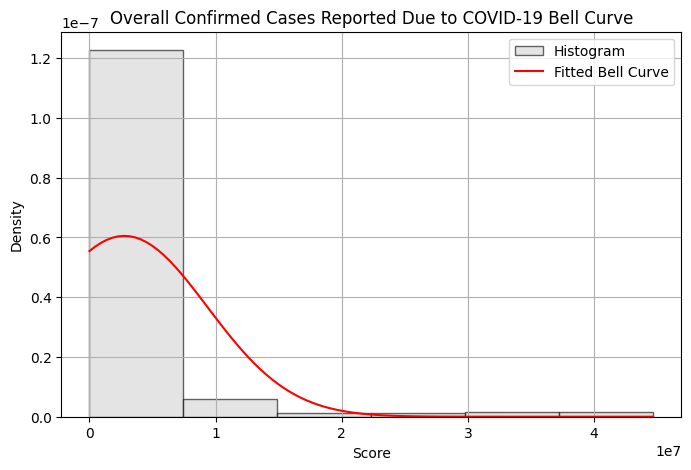

Mean: 2764251.55
Standard Deviation: 6591734.29
Minimum: 1
Maximum: 44690738
Median: 559794.0
Mode: 1
Dataframe size: 244


In [229]:
## statistical analysis on Confirmed Cases of ALL data combined

confirmed_overall = df_all['Confirmed']

overall_confirmed_mean = np.mean(df_all['Confirmed'])
overall_confirmed_std = np.std(df_all['Confirmed'])
overall_confirmed_min = np.min(df_all['Confirmed'])
overall_confirmed_max = np.max(df_all['Confirmed'])
overall_confirmed_median = np.median(df_all['Confirmed'])
overall_confirmed_mode = np.argmax(np.bincount(df_all['Confirmed']))
overall_confirmed_dfsize = len(df_all['Confirmed'])    # to remind people of sample

x = np.linspace(min(df_all['Confirmed'])-10, max(df_all['Confirmed'])+10, 100)
y = norm.pdf(x, overall_confirmed_mean, overall_confirmed_std)

# Plotting a histogram and bell curve to show statistical significance
plt.figure(figsize=(8, 5))
plt.hist(df_all['Confirmed'], bins=6, density=True, alpha=0.6, color='lightgray', edgecolor='black', label='Histogram')
plt.plot(x, y, color='red', label='Fitted Bell Curve')
plt.title('Overall Confirmed Cases Reported Due to COVID-19 Bell Curve')
plt.xlabel('Score')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

print(f'Mean: {round(overall_confirmed_mean, 2)}')
print(f'Standard Deviation: {round(overall_confirmed_std, 2)}')
print(f'Minimum: {round(overall_confirmed_min, 2)}')
print(f'Maximum: {round(overall_confirmed_max, 2)}')
print(f'Median: {round(overall_confirmed_median, 2)}')
print(f'Mode: {round(overall_confirmed_mode, 2)}')
print(f'Dataframe size: {round(overall_confirmed_dfsize, 2)}')

In [290]:
# Total confirmed cases reported worldwide
sum_overall_confirmed = df_all['Confirmed'].sum()
print(f'Total confirmed cases reported worldwide: {sum_overall_confirmed}')

Total confirmed cases reported worldwide: 674477379


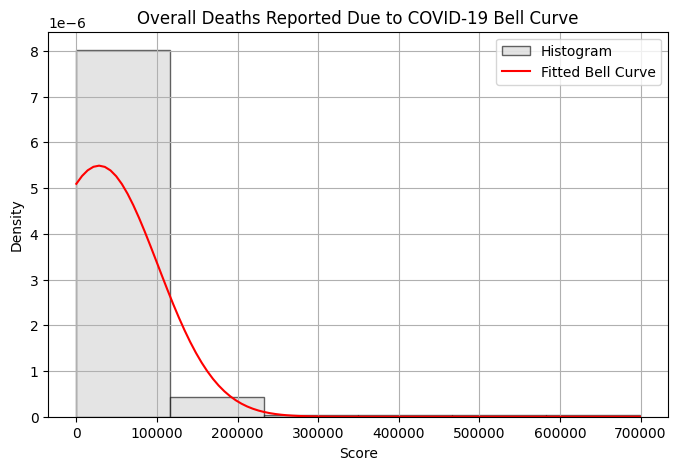

Mean: 28148.34
Standard Deviation: 72667.77
Minimum: 0
Maximum: 699276
Median: 5543.5
Mode: 0
Dataframe size: 244


In [230]:
## statistical analysis on DEATHS of ALL data combined

deaths_overall = df_all['Deaths']

overall_deaths_mean = np.mean(df_all['Deaths'])
overall_deaths_std = np.std(df_all['Deaths'])
overall_deaths_min = np.min(df_all['Deaths'])
overall_deaths_max = np.max(df_all['Deaths'])
overall_deaths_median = np.median(df_all['Deaths'])
overall_deaths_mode = np.argmax(np.bincount(df_all['Deaths']))
overall_deaths_dfsize = len(df_all['Deaths'])    # to remind people of sample size

x = np.linspace(min(df_all['Deaths'])-10, max(df_all['Deaths'])+10, 100)
y = norm.pdf(x, overall_deaths_mean, overall_deaths_std)

# Plotting a histogram and bell curve to show statistical significance
plt.figure(figsize=(8, 5))
plt.hist(df_all['Deaths'], bins=6, density=True, alpha=0.6, color='lightgray', edgecolor='black', label='Histogram')
plt.plot(x, y, color='red', label='Fitted Bell Curve')
plt.title('Overall Deaths Reported Due to COVID-19 Bell Curve')
plt.xlabel('Score')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

print(f'Mean: {round(overall_deaths_mean, 2)}')
print(f'Standard Deviation: {round(overall_deaths_std, 2)}')
print(f'Minimum: {round(overall_deaths_min, 2)}')
print(f'Maximum: {round(overall_deaths_max, 2)}')
print(f'Median: {round(overall_deaths_median, 2)}')
print(f'Mode: {round(overall_deaths_mode, 2)}')
print(f'Dataframe size: {round(overall_deaths_dfsize, 2)}')

In [291]:
# Total deaths reported worldwide
sum_overall_deaths = df_all['Deaths'].sum()
print(f'Total deaths reported worldwide: {sum_overall_deaths}')

Total deaths reported worldwide: 6868196
